In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load raw combined data

In [2]:
# Load movie+book data
import pandas as pd
all_data_df = pd.read_pickle('../dump/all_ab_df')

In [3]:
all_data_df.shape

(1812, 35)

In [4]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1812 entries, 0 to 1811
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_title          1812 non-null   object        
 1   rating               1812 non-null   float64       
 2   vote                 1812 non-null   int64         
 3   certificate          1812 non-null   object        
 4   genre                1812 non-null   object        
 5   release_date         1812 non-null   datetime64[ns]
 6   metascore            686 non-null    float64       
 7   keywords             1812 non-null   object        
 8   budget               1312 non-null   float64       
 9   opening_weekend_usa  1091 non-null   float64       
 10  gross_usa            1238 non-null   float64       
 11  gross_world          1327 non-null   float64       
 12  runtime              1791 non-null   float64       
 13  director             1812 non-nul

In [5]:
all_df = all_data_df.drop(columns=['vote','metascore','keywords',\
                                   'link_d','link_s','link_w',\
                                   'book_title','years']).\
                    drop_duplicates(subset=['movie_title','director'])
all_df.rename(columns = {'certificate':'MPAA','star':'actor','year':'publish_year',\
                        'rating_value':'rating_value_b','rating_count':'rating_count_b','review_count':'review_count_b'},\
              inplace=True)

In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1811
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_title          1135 non-null   object        
 1   rating               1135 non-null   float64       
 2   MPAA                 1135 non-null   object        
 3   genre                1135 non-null   object        
 4   release_date         1135 non-null   datetime64[ns]
 5   budget               830 non-null    float64       
 6   opening_weekend_usa  713 non-null    float64       
 7   gross_usa            790 non-null    float64       
 8   gross_world          842 non-null    float64       
 9   runtime              1124 non-null   float64       
 10  director             1135 non-null   object        
 11  writer               1135 non-null   object        
 12  actor                1135 non-null   object        
 13  distributor          1133 non-nul

In [7]:
all_df[all_df.publish_year.isna()==True]

,movie_title,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,rating_value_b,rating_count_b,review_count_b,page,publish_year,title,book_popularity,author_popularity,release_year,count_a
1083,Nevada Smith,6.9,Not,[Western],1966-07-23,NaN,NaN,14170000.0,NaN,139.0,...,4.25,4.0,1.0,130.0,NaN,Nevada Smith,0.00,0.0301,1966,0
1258,The Man Who Knew Too Little,6.7,PG,"[Comedy, Crime, Drama]",1997-11-14,20000000.0,4604819.0,13717039.0,13717039.0,94.0,...,4.00,1.0,1.0,NaN,NaN,The Man Who Knew Too Little,0.14,0.0376,1997,0
1271,Airport 1975,5.7,PG,"[Action, Drama, Thriller]",1974-10-18,3000000.0,NaN,NaN,NaN,107.0,...,3.00,2.0,1.0,NaN,NaN,Airport 1975,0.25,0.2990,1974,0
1619,Bend of the River,7.3,Approved,"[Action, Adventure, Romance]",1952-04-15,NaN,NaN,NaN,NaN,101.0,...,4.00,4.0,0.0,NaN,NaN,Bend of the River,0.02,0.0129,1952,0


In [8]:
all_df.loc[1083,'publish_year'] = 1961
all_df.loc[1258,'publish_year'] = 1989
all_df.loc[1271,'publish_year'] = 1968
all_df.loc[1619,'publish_year'] = 1950

In [9]:
# fillna with mean of all movies
# all_df.fillna(all_df.mean(),inplace=True)

In [10]:
all_df[all_df['budget'].isna()==True].budget

0      NaN
12     NaN
25     NaN
31     NaN
32     NaN
        ..
1801   NaN
1806   NaN
1808   NaN
1810   NaN
1811   NaN
Name: budget, Length: 305, dtype: float64

In [11]:
all_df.iloc[0].budget

nan

In [12]:
# all_df = all_df.dropna(subset=['gross_usa','gross_world','opening_weekend_usa','budget']).reset_index()

In [13]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1811
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_title          1135 non-null   object        
 1   rating               1135 non-null   float64       
 2   MPAA                 1135 non-null   object        
 3   genre                1135 non-null   object        
 4   release_date         1135 non-null   datetime64[ns]
 5   budget               830 non-null    float64       
 6   opening_weekend_usa  713 non-null    float64       
 7   gross_usa            790 non-null    float64       
 8   gross_world          842 non-null    float64       
 9   runtime              1124 non-null   float64       
 10  director             1135 non-null   object        
 11  writer               1135 non-null   object        
 12  actor                1135 non-null   object        
 13  distributor          1133 non-nul

In [14]:
all_df.head()

,movie_title,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,rating_value_b,rating_count_b,review_count_b,page,publish_year,title,book_popularity,author_popularity,release_year,count_a
0,After We Collided,5.0,R,"[Drama, Romance]",2020-10-23,NaN,422899.0,2386483.0,4.799041e+07,105.0,...,3.78,92534.0,5490.0,674.0,2013.0,After We Collided,0.00,0.2159,2020,12
1,The Godfather,9.2,R,"[Crime, Drama]",1972-03-24,6000000.0,302393.0,134966411.0,2.461210e+08,175.0,...,4.36,343457.0,8930.0,448.0,1969.0,The Godfather,0.16,0.0699,1972,1
2,Harry Potter and the Sorcerer's Stone,7.6,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,4.48,7292896.0,115556.0,309.0,1997.0,Harry Potter and the Sorcerer's Stone,0.14,0.0149,2001,4
4,Little Women,7.8,PG,"[Drama, Romance]",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,135.0,...,4.09,1717984.0,31224.0,449.0,1868.0,Little Women,0.00,0.0151,2019,0
8,Little Women,7.3,PG,"[Drama, Family, Romance]",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,115.0,...,4.09,1717984.0,31224.0,449.0,1868.0,Little Women,0.00,0.0151,1994,0


In [15]:
all_data_df.shape

(1812, 35)

In [16]:
all_df.shape

(1135, 27)

In [17]:
all_df.to_pickle('../dump/all_df')

In [18]:
all_df.columns

Index(['movie_title', 'rating', 'MPAA', 'genre', 'release_date', 'budget',
       'opening_weekend_usa', 'gross_usa', 'gross_world', 'runtime',
       'director', 'writer', 'actor', 'distributor', 'language', 'country',
       'author', 'rating_value_b', 'rating_count_b', 'review_count_b', 'page',
       'publish_year', 'title', 'book_popularity', 'author_popularity',
       'release_year', 'count_a'],
      dtype='object')

## 2. Collect more features

### (1) release time of the movie

In [19]:
# Divide release_date into year, month, day of week
all_df['release_year'] = all_df['release_date'].dt.year
all_df['release_month'] = all_df['release_date'].dt.month
all_df['dow'] = all_df['release_date'].dt.weekday

### (2) director value

In [20]:
# Find corresponding value of each director when movie is released
# ['avg_rating','avg_gross'] (per movie directed)
director_df = pd.read_pickle('../dump/director_data')

In [21]:
director_df.director.nunique()

4590

In [22]:
# Find the mean rating, gross of all directors
director_rating_mean = int(director_df.rating.mean())
director_gross_mean = int(director_df.gross_usa.mean())

director_rating_mean, director_gross_mean

(6, 32634196)

In [23]:
def director_value(movie):
    """
    input: movie (each row in all_data_df)
    output: 
        - film_count: number of movies directed before the movie of interest
        - avg_rating: average rating of movies directed before the movie of interest
        - avg_gross: gross per movie before the movie of interest
    """
    
    movie_title = movie.movie_title
    director = movie.director
    year = movie.release_date

    headers = ['movie_title','director','film_count_d','avg_rating_d','avg_gross_d']
    
    # Assign default values
    film_count,avg_rating,avg_gross = 0, director_rating_mean, director_gross_mean
    
    doi_df = director_df[(director_df.director == director) & (director_df.year < year)]
    
    # Fill NaN with director's mean
    doi_df[['rating','gross_usa']].apply(lambda x: x.fillna(x.mean(),axis=0))
    
    # If there's still NaN, fill with all directors' mean
    doi_df[['rating']] = doi_df[['rating']].apply(lambda x: x.fillna(director_rating_mean,axis=0))
    doi_df[['gross_usa']] = doi_df[['gross_usa']].apply(lambda x: x.fillna(director_gross_mean,axis=0))
    
   
    if doi_df.shape[0] == 0:
        film_count,avg_rating,avg_gross = 0, director_rating_mean, director_gross_mean
    else:
        
    
    
        film_count = doi_df.shape[0]

        
        avg_rating = doi_df['rating'].mean()
        if avg_rating == np.nan:
            avg_rating = director_rating_mean

        try:
            avg_gross = int(doi_df['gross_usa'].mean())
        except ValueError:
            avg_gross = director_gross_mean
        
    
    director_value = dict(zip(headers, [movie_title,director,film_count,avg_rating,avg_gross]))
    
    return director_value

In [24]:
# Create df including columns of director film_count, avg_rating, avg_gross
# Rows correspond to rows in all_df
movie_director_df = all_df.apply(director_value,axis=1).apply(pd.Series)

In [25]:
# Merge all_df and director value
all_d_df = pd.merge(all_df, movie_director_df, left_index=True, right_index=True ,how='left')

In [26]:
# Merge all_df and director value
all_d_df = pd.merge(all_df, movie_director_df, on=['movie_title','director'] ,how='left')

In [27]:
all_d_df

,movie_title,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,title,book_popularity,author_popularity,release_year,count_a,release_month,dow,film_count_d,avg_rating_d,avg_gross_d
0,After We Collided,5.0,R,"[Drama, Romance]",2020-10-23,NaN,422899.0,2386483.0,4.799041e+07,105.0,...,After We Collided,0.00,0.2159,2020,12,10,4,6,5.316667,31997784
1,The Godfather,9.2,R,"[Crime, Drama]",1972-03-24,6000000.0,302393.0,134966411.0,2.461210e+08,175.0,...,The Godfather,0.16,0.0699,1972,1,3,4,7,5.285714,32634196
2,Harry Potter and the Sorcerer's Stone,7.6,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,Harry Potter and the Sorcerer's Stone,0.14,0.0149,2001,4,11,4,9,6.622222,106588545
3,Little Women,7.8,PG,"[Drama, Romance]",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,135.0,...,Little Women,0.00,0.0151,2019,0,12,2,2,6.700000,24481851
4,Little Women,7.3,PG,"[Drama, Family, Romance]",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,115.0,...,Little Women,0.00,0.0151,1994,0,12,6,11,6.663636,24220795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,The Wayward Bus,6.7,Not,[Drama],1957-05-27,NaN,NaN,NaN,NaN,87.0,...,The Wayward Bus,0.00,0.0176,1957,18,5,0,8,6.125000,32634196
1131,From the Terrace,6.7,Passed,"[Drama, Romance]",1960-09-09,NaN,NaN,11336000.0,NaN,149.0,...,From the Terrace,0.00,0.0418,1960,3,9,4,22,6.627273,29622714
1132,Anne of Green Gables,7.0,Passed,"[Comedy, Drama, Family]",1934-11-23,226000.0,NaN,NaN,NaN,78.0,...,Anne of Green Gables,0.05,0.0314,1934,0,11,4,1,6.400000,32634196
1133,Odds Against Tomorrow,7.4,Approved,"[Crime, Drama, Thriller]",1959-11-01,NaN,NaN,NaN,NaN,100.0,...,Odds Against Tomorrow,0.00,0.0180,1959,0,11,6,25,6.776000,31384828


In [28]:
all_d_df.columns

Index(['movie_title', 'rating', 'MPAA', 'genre', 'release_date', 'budget',
       'opening_weekend_usa', 'gross_usa', 'gross_world', 'runtime',
       'director', 'writer', 'actor', 'distributor', 'language', 'country',
       'author', 'rating_value_b', 'rating_count_b', 'review_count_b', 'page',
       'publish_year', 'title', 'book_popularity', 'author_popularity',
       'release_year', 'count_a', 'release_month', 'dow', 'film_count_d',
       'avg_rating_d', 'avg_gross_d'],
      dtype='object')

In [29]:
# Fillna with director avg gross in USA
all_d_df.loc[(pd.isnull(all_d_df.gross_usa)),'gross_usa'] =\
all_d_df.loc[(pd.isnull(all_d_df.gross_usa)),'avg_gross_d']

In [30]:
# all_d_df[all_d_df.gross_usa.isna()==True]

In [31]:
all_d_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1134
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_title          1135 non-null   object        
 1   rating               1135 non-null   float64       
 2   MPAA                 1135 non-null   object        
 3   genre                1135 non-null   object        
 4   release_date         1135 non-null   datetime64[ns]
 5   budget               830 non-null    float64       
 6   opening_weekend_usa  713 non-null    float64       
 7   gross_usa            1135 non-null   float64       
 8   gross_world          842 non-null    float64       
 9   runtime              1124 non-null   float64       
 10  director             1135 non-null   object        
 11  writer               1135 non-null   object        
 12  actor                1135 non-null   object        
 13  distributor          1133 non-nul

### (3) cast (actors) value

In [32]:
# # Find corresponding value of each director when movie is released
# # ['avg_rating','avg_gross'] (per movie directed)
# actor_df = pd.read_pickle('../dump/actor_correct_data')
# actor_df.shape

In [33]:
# actor_df.head()

In [34]:
# actor_df.director.nunique()

In [35]:
# # Find the mean rating, gross of all directors
# actor_rating_mean = int(actor_df.rating.mean())
# actor_gross_mean = int(actor_df.gross_usa.mean())

# actor_rating_mean, actor_gross_mean

In [36]:
def actor_value(actor,year):
    """
    input: actor name and (release) year of the movie of interest
    output: 
        - film_count: number of movies the actor was in before the movie of interest
        - avg_rating: average rating of movies the actor was in before the movie of interest
        - avg_gross: gross per movie before the movie of interest
    """
    
    aoi_df = actor_df[(actor_df.actor == actor) & (actor_df.year.dt.year < year)].copy()
    
    # Fill NaN with actor's mean
    values={'rating':aoi_df.rating.mean(), 'gross_usa':aoi_df.gross_usa.mean()}
    aoi_df.fillna(value=values,inplace=True)
    
    # If there's still NaN, fill with all actors' mean
    values={'rating':actor_rating_mean, 'gross_usa':actor_gross_mean}
    aoi_df.fillna(value=values,inplace=True)
        
    
    # If there's no movie prior to movie of interest  
    if aoi_df.shape[0] == 0:
        film_count,avg_rating,avg_gross = 0, actor_rating_mean, actor_gross_mean
        
    else:
        
        film_count = aoi_df.shape[0]
        
        avg_rating = aoi_df['rating'].mean()
        avg_gross = aoi_df['gross_usa'].mean()

        
    
    actor_value = [film_count, avg_rating, avg_gross]
    
    print(actor,actor_value)
    
    return actor_value,aoi_df

In [37]:
def get_cast(movie):
    """
    input: movie (each row in all_data_df)
    output: 
        - film_count: number of movies directed before the movie of interest
        - avg_rating: average rating of movies directed before the movie of interest
        - avg_gross: gross per movie before the movie of interest
    """
    
    movie_title = movie.movie_title
    year = movie.release_year
    actors = movie.actor
    lead = actors[0]
    
    film_counts = []
    ratings = []
    grosses = []
    
    for actor in actors:
        result = actor_value(actor,year)
        film_counts.append(result[0])
        ratings.append(result[1])
        grosses.append(result[2])
        
    avg_film_count = np.mean(film_counts)
    avg_rating = np.mean(ratings)
    avg_gross = np.mean(grosses)    
    
    
    lead_result = actor_value(lead,year)
    

    headers = ['movie_title','cast','avg_film_count_c','avg_rating_c','avg_gross_c',\
              'avg_film_count_l','avg_rating_l','avg_gross_l']

        
    
    cast_info = dict(zip(headers, [movie_title,actors,avg_film_count,avg_rating,avg_gross,\
                                  lead_result[0],lead_result[1],lead_result[2]]))
    
    return cast_info

In [38]:
# # Create df including columns of director film_count, avg_rating, avg_gross
# # Rows correspond to rows in all_df
# movie_actor_df = all_df.iloc[:2].apply(get_cast,axis=1).apply(pd.Series)

In [39]:
# # Merge all_df and cast info
# all_dc_df = pd.merge(all_d_df, movie_actor_df, lon=['movie_title','director'] ,how='left')

### (4) book and author popularity

In [40]:
# Load book_history_2
book_history = pd.read_pickle('../dump/book_history_2_data_all')

In [41]:
# book_history.sort_values('book_popularity',ascending=False)

In [42]:
book_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 128
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  1295 non-null   object 
 1   release_date           1295 non-null   object 
 2   genre                  1295 non-null   object 
 3   title_search           1291 non-null   float64
 4   search_fiction_book    1285 non-null   float64
 5   author_search          1294 non-null   float64
 6   search_fiction_author  1295 non-null   int64  
 7   book_popularity        1281 non-null   float64
 8   author_popularity      1294 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 101.2+ KB


In [43]:
all_d_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1134
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_title          1135 non-null   object        
 1   rating               1135 non-null   float64       
 2   MPAA                 1135 non-null   object        
 3   genre                1135 non-null   object        
 4   release_date         1135 non-null   datetime64[ns]
 5   budget               830 non-null    float64       
 6   opening_weekend_usa  713 non-null    float64       
 7   gross_usa            1135 non-null   float64       
 8   gross_world          842 non-null    float64       
 9   runtime              1124 non-null   float64       
 10  director             1135 non-null   object        
 11  writer               1135 non-null   object        
 12  actor                1135 non-null   object        
 13  distributor          1133 non-nul

In [44]:
book_history['release_date'] = book_history['release_date'].astype('datetime64[ns]')

In [45]:
book_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 128
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  1295 non-null   object        
 1   release_date           1295 non-null   datetime64[ns]
 2   genre                  1295 non-null   object        
 3   title_search           1291 non-null   float64       
 4   search_fiction_book    1285 non-null   float64       
 5   author_search          1294 non-null   float64       
 6   search_fiction_author  1295 non-null   int64         
 7   book_popularity        1281 non-null   float64       
 8   author_popularity      1294 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 101.2+ KB


<AxesSubplot:>

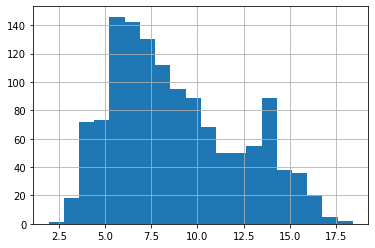

In [46]:
np.log(book_history.title_search).hist(bins=20)

<AxesSubplot:>

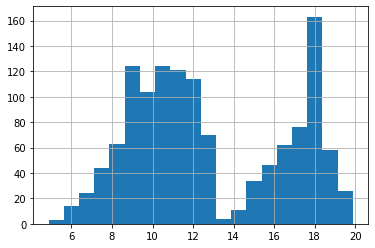

In [47]:
np.log(book_history.search_fiction_book).hist(bins=20)

<AxesSubplot:>

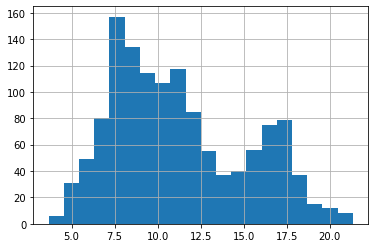

In [48]:
np.log(book_history.author_search).hist(bins=20)

<AxesSubplot:>

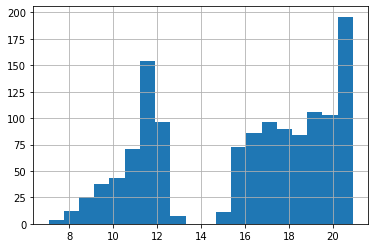

In [49]:
np.log(book_history.search_fiction_author).hist(bins=20)

In [50]:
all_d_df.shape, book_history.shape

((1135, 32), (1295, 9))

In [51]:
# Merge book data with movie df
all_da_df = pd.merge(all_d_df, book_history, left_on=['movie_title','release_date'],\
                      right_on=['title','release_date'],how='left',copy=False)

In [52]:
all_da_df['log_book_search'] = np.log(all_da_df['title_search'])
all_da_df['log_author_search'] = np.log(all_da_df['author_search'])

In [53]:
all_da_df.columns

Index(['movie_title', 'rating', 'MPAA', 'genre_x', 'release_date', 'budget',
       'opening_weekend_usa', 'gross_usa', 'gross_world', 'runtime',
       'director', 'writer', 'actor', 'distributor', 'language', 'country',
       'author', 'rating_value_b', 'rating_count_b', 'review_count_b', 'page',
       'publish_year', 'title_x', 'book_popularity_x', 'author_popularity_x',
       'release_year', 'count_a', 'release_month', 'dow', 'film_count_d',
       'avg_rating_d', 'avg_gross_d', 'title_y', 'genre_y', 'title_search',
       'search_fiction_book', 'author_search', 'search_fiction_author',
       'book_popularity_y', 'author_popularity_y', 'log_book_search',
       'log_author_search'],
      dtype='object')

In [54]:
# all_da_df.drop(columns=['title', 'genre_y','book_popularity_x','author_popularity_x'],inplace=True)

In [55]:
all_da_df.columns

Index(['movie_title', 'rating', 'MPAA', 'genre_x', 'release_date', 'budget',
       'opening_weekend_usa', 'gross_usa', 'gross_world', 'runtime',
       'director', 'writer', 'actor', 'distributor', 'language', 'country',
       'author', 'rating_value_b', 'rating_count_b', 'review_count_b', 'page',
       'publish_year', 'title_x', 'book_popularity_x', 'author_popularity_x',
       'release_year', 'count_a', 'release_month', 'dow', 'film_count_d',
       'avg_rating_d', 'avg_gross_d', 'title_y', 'genre_y', 'title_search',
       'search_fiction_book', 'author_search', 'search_fiction_author',
       'book_popularity_y', 'author_popularity_y', 'log_book_search',
       'log_author_search'],
      dtype='object')

In [56]:
all_da_df.rename(columns = {'genre_x':'genre','book_popularity_y':'book_popularity',\
                            'author_popularity_y':'author_popularity'},inplace=True)

In [57]:
all_da_df

,movie_title,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,title_y,genre_y,title_search,search_fiction_book,author_search,search_fiction_author,book_popularity,author_popularity,log_book_search,log_author_search
0,After We Collided,5.0,R,"[Drama, Romance]",2020-10-23,NaN,422899.0,2386483.0,4.799041e+07,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Godfather,9.2,R,"[Crime, Drama]",1972-03-24,6000000.0,302393.0,134966411.0,2.461210e+08,175.0,...,The Godfather,"[Crime, Drama]",192.0,728.0,258.0,4550.0,0.26,0.0567,5.257495,5.552960
2,Harry Potter and the Sorcerer's Stone,7.6,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,Harry Potter and the Sorcerer's Stone,"[Adventure, Family, Fantasy]",5720.0,31300.0,68600.0,5680000.0,0.18,0.0121,8.651724,11.136048
3,Harry Potter and the Sorcerer's Stone,7.6,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,Harry Potter and the Sorcerer's Stone,"[Adventure, Family, Fantasy]",5720.0,31300.0,68600.0,5680000.0,0.18,0.0121,8.651724,11.136048
4,Little Women,7.8,PG,"[Drama, Romance]",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,135.0,...,Little Women,"[Drama, Romance]",214000.0,37500000.0,2060000.0,210000000.0,0.01,0.0098,12.273731,14.538217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,The Wayward Bus,6.7,Not,[Drama],1957-05-27,NaN,NaN,32634196.0,NaN,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,From the Terrace,6.7,Passed,"[Drama, Romance]",1960-09-09,NaN,NaN,11336000.0,NaN,149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,Anne of Green Gables,7.0,Passed,"[Comedy, Drama, Family]",1934-11-23,226000.0,NaN,32634196.0,NaN,78.0,...,Anne of Green Gables,"[Comedy, Drama, Family]",6820000.0,54900000.0,27900000.0,737000000.0,0.12,0.0379,15.735370,17.144137
1521,Odds Against Tomorrow,7.4,Approved,"[Crime, Drama, Thriller]",1959-11-01,NaN,NaN,31384828.0,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
all_da_df.drop_duplicates(subset=['movie_title','release_date'],inplace=True)

In [59]:
all_da_df.shape

(1135, 42)

In [60]:
all_da_df.columns

Index(['movie_title', 'rating', 'MPAA', 'genre', 'release_date', 'budget',
       'opening_weekend_usa', 'gross_usa', 'gross_world', 'runtime',
       'director', 'writer', 'actor', 'distributor', 'language', 'country',
       'author', 'rating_value_b', 'rating_count_b', 'review_count_b', 'page',
       'publish_year', 'title_x', 'book_popularity_x', 'author_popularity_x',
       'release_year', 'count_a', 'release_month', 'dow', 'film_count_d',
       'avg_rating_d', 'avg_gross_d', 'title_y', 'genre_y', 'title_search',
       'search_fiction_book', 'author_search', 'search_fiction_author',
       'book_popularity', 'author_popularity', 'log_book_search',
       'log_author_search'],
      dtype='object')

In [61]:
all_df = all_da_df

In [62]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1522
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   movie_title            1135 non-null   object        
 1   rating                 1135 non-null   float64       
 2   MPAA                   1135 non-null   object        
 3   genre                  1135 non-null   object        
 4   release_date           1135 non-null   datetime64[ns]
 5   budget                 830 non-null    float64       
 6   opening_weekend_usa    713 non-null    float64       
 7   gross_usa              1135 non-null   float64       
 8   gross_world            842 non-null    float64       
 9   runtime                1124 non-null   float64       
 10  director               1135 non-null   object        
 11  writer                 1135 non-null   object        
 12  actor                  1135 non-null   object        
 13  dis

In [63]:
all_df[all_df.search_fiction_book.isna() == True]

,movie_title,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,title_y,genre_y,title_search,search_fiction_book,author_search,search_fiction_author,book_popularity,author_popularity,log_book_search,log_author_search
0,After We Collided,5.0,R,"[Drama, Romance]",2020-10-23,NaN,422899.0,2386483.0,47990414.0,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Little Women,7.3,Approved,"[Drama, Family, Romance]",1949-04-01,NaN,NaN,7466500.0,12905600.0,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,The Invisible Man,7.7,TV-PG,"[Horror, Sci-Fi]",1933-11-13,NaN,NaN,27199443.0,27105.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,The Dry,7.7,1h,"[Crime, Drama, Mystery]",2021-01-01,NaN,NaN,27209899.0,5855861.0,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,The War with Grandpa,5.5,PG,"[Comedy, Drama, Family]",2020-10-09,NaN,3623880.0,19341450.0,34170113.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,Island of the Blue Dolphins,6.1,1h,"[Adventure, Biography, Drama]",1964-09-10,NaN,NaN,32634196.0,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,The Wayward Bus,6.7,Not,[Drama],1957-05-27,NaN,NaN,32634196.0,NaN,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,From the Terrace,6.7,Passed,"[Drama, Romance]",1960-09-09,NaN,NaN,11336000.0,NaN,149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,Odds Against Tomorrow,7.4,Approved,"[Crime, Drama, Thriller]",1959-11-01,NaN,NaN,31384828.0,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Fill up the four missing values
all_df.loc[55,'search_fiction_book'] = 29600
all_df.loc[128,'search_fiction_book'] = 44200
all_df.loc[706,'search_fiction_book'] = 26200
all_df.loc[824,'search_fiction_book'] = 29200
all_df.loc[919,'search_fiction_book'] = 238000

all_df.loc[1357,'search_fiction_book'] = 61300
all_df.loc[1404,'search_fiction_book'] = 29200
all_df.loc[1445,'search_fiction_book'] = 44100

In [65]:
# Re-evaluate book_popularity

In [66]:
all_df['book_popularity_test'] = all_df['title_search'] / all_df['search_fiction_book']

<AxesSubplot:>

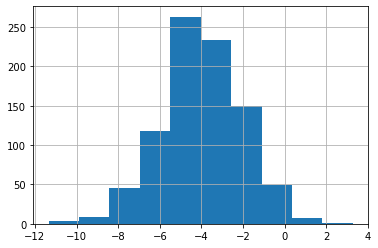

In [67]:
# log plot distribution looks ok
np.log(all_df['book_popularity_test']).hist()

In [68]:
all_df['log_book_popularity'] = np.log(all_df['book_popularity_test'])

In [69]:
# Same for author populatiry
all_df['author_popularity_test'] = all_df['author_search'] / all_df['search_fiction_author']

<AxesSubplot:>

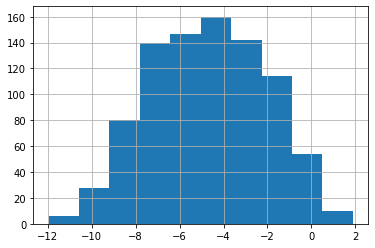

In [70]:
np.log(all_df['author_popularity_test']).hist()

In [71]:
all_df['log_author_popularity'] = np.log(all_df['author_popularity_test'])

In [72]:
all_df.shape

(1135, 46)

In [73]:
all_df.to_pickle('../dump/complete_data')

## 3. Simple EDA

In [74]:
all_df.corr()

,rating,budget,opening_weekend_usa,gross_usa,gross_world,runtime,rating_value_b,rating_count_b,review_count_b,page,...,author_search,search_fiction_author,book_popularity,author_popularity,log_book_search,log_author_search,book_popularity_test,log_book_popularity,author_popularity_test,log_author_popularity
rating,1.000000,-0.063073,0.077431,0.225434,0.199837,0.272943,0.228420,0.115617,0.119337,0.029876,...,0.017086,0.249235,0.023629,-0.052623,0.193656,0.105211,0.012689,0.091055,-0.052626,0.029491
budget,-0.063073,1.000000,0.625747,0.555791,0.671365,0.166458,0.150978,0.285879,0.241206,0.088296,...,-0.078074,-0.325793,0.004907,-0.025467,-0.122364,-0.102243,-0.027229,0.017641,-0.025467,-0.161562
opening_weekend_usa,0.077431,0.625747,1.000000,0.845860,0.852947,0.162687,0.202666,0.524430,0.447139,0.119929,...,0.051499,0.002917,0.054716,0.107244,0.224825,0.209465,0.061033,0.056855,0.107242,-0.014309
gross_usa,0.225434,0.555791,0.845860,1.000000,0.925121,0.222852,0.174291,0.403204,0.337226,0.099477,...,-0.012094,-0.076215,0.054662,0.036373,0.036528,0.022986,0.005048,0.092941,0.036369,-0.012868
gross_world,0.199837,0.671365,0.852947,0.925121,1.000000,0.257278,0.222423,0.463302,0.384959,0.120449,...,0.013268,-0.073085,0.043603,0.077638,0.110596,0.105643,0.050290,0.083045,0.077634,-0.026242
runtime,0.272943,0.166458,0.162687,0.222852,0.257278,1.000000,0.186103,0.140060,0.131281,0.339467,...,-0.020891,-0.016835,0.007481,0.014893,0.009130,-0.006777,-0.023911,0.031851,0.014891,0.070889
rating_value_b,0.228420,0.150978,0.202666,0.174291,0.222423,0.186103,1.000000,0.193470,0.203491,0.191211,...,-0.011524,-0.044241,0.030999,0.005268,0.003547,-0.020890,0.018327,0.102459,0.005271,0.055994
rating_count_b,0.115617,0.285879,0.524430,0.403204,0.463302,0.140060,0.193470,1.000000,0.869757,0.127277,...,0.028047,-0.023825,0.007516,0.127954,0.127041,0.101197,-0.012761,0.099844,0.127952,0.011643
review_count_b,0.119337,0.241206,0.447139,0.337226,0.384959,0.131281,0.203491,0.869757,1.000000,0.131830,...,0.054342,-0.021747,-0.016583,0.195648,0.167436,0.131180,-0.020316,0.000106,0.195645,-0.042591
page,0.029876,0.088296,0.119929,0.099477,0.120449,0.339467,0.191211,0.127277,0.131830,1.000000,...,0.026105,-0.003265,0.074824,0.055310,0.077476,0.062915,-0.008417,0.068960,0.055306,0.082576


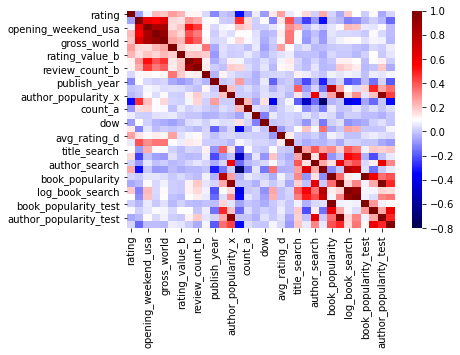

In [75]:
# sns.heatmap(all_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
sns.heatmap(all_df.corr(), cmap="seismic", vmin=-0.8, vmax=1);

In [76]:
continuous_variables = ['opening_weekend_usa', 'gross_usa', 'gross_world','rating', \
                        'budget','runtime','release_year', 'release_month','dow',\
                        'film_count_d', 'avg_rating_d', 'avg_gross_d', \
        'page', 'publish_year','log_book_search','title_search','search_fiction_book', \
        'log_author_search','author_search', 'search_fiction_author',\
       'book_popularity', 'author_popularity']
all_df_select = all_df[continuous_variables]

In [77]:
# sns.pairplot(all_df_select)

## 4. Clean each column
Clean the format and convert data type if necessarry for later steps.

### (1) Target variable
### (i) opening_weekend_usa

<AxesSubplot:>

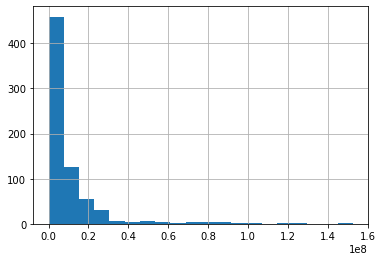

In [78]:
# Examine the distribution. Pretty skewed.
all_df['opening_weekend_usa'].hist(bins=20)
# all_df['opening_weekend_usa']

<AxesSubplot:>

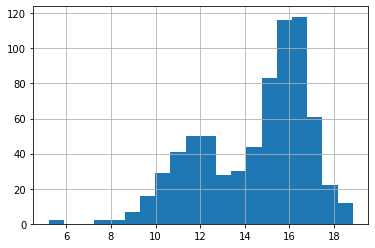

In [79]:
# Try log. Slightly better. Still not very normal
np.log(all_df['opening_weekend_usa']).hist(bins=20)

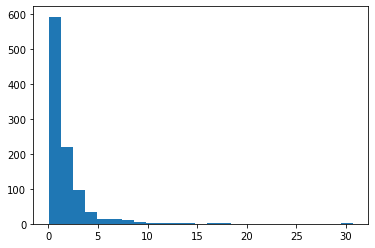

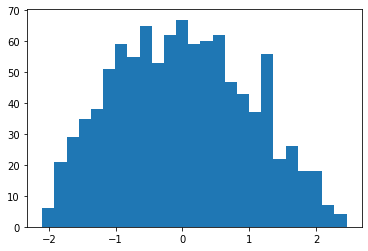

In [80]:
# demonstration of the power transform on data with a skew
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot as plt
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
plt.hist(data, bins=25)
plt.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)
# histogram of the transformed data
plt.hist(data_trans, bins=25)
plt.show()

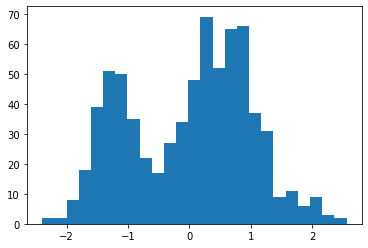

In [81]:
# Explore power transform
data = all_df[['opening_weekend_usa']]
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)
plt.hist(data_trans, bins=25)
plt.show()

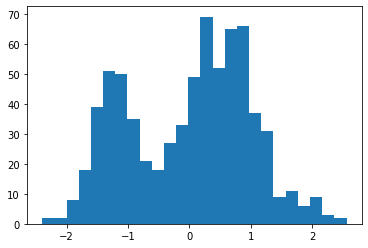

In [82]:
# Explore power transform (box-cox)
data = all_df[['opening_weekend_usa']]
power = PowerTransformer(method='box-cox', standardize=True)
data_trans = power.fit_transform(data)
plt.hist(data_trans, bins=25)
plt.show()

In [83]:
# Seems like both log and power transform are similarr
all_df['log_owu'] = np.log(all_df['opening_weekend_usa'])

data = all_df[['opening_weekend_usa']]
power = PowerTransformer(method='box-cox', standardize=True)
data_trans = power.fit_transform(data)
all_df['log_owu'] = data_trans.reshape(len(data),)

In [84]:
all_df.shape

(1135, 47)

### (ii) gross_world

In [85]:
# Examine the distribution. Pretty skewed.
# all_df['opening_weekend_usa'].hist(bins=20)
all_df['gross_world']

0       4.799041e+07
1       2.461210e+08
2       1.006918e+09
4       2.166012e+08
8       5.008362e+07
            ...     
1518             NaN
1519             NaN
1520             NaN
1521             NaN
1522    1.570073e+07
Name: gross_world, Length: 1135, dtype: float64

<AxesSubplot:>

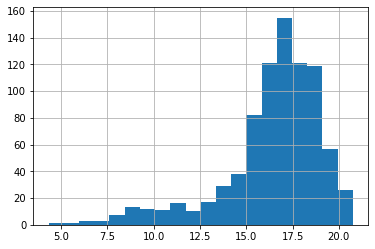

In [86]:
# Try log. Slightly better. Still not very normal
np.log(all_df['gross_world']).hist(bins=20)

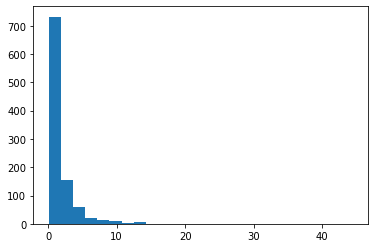

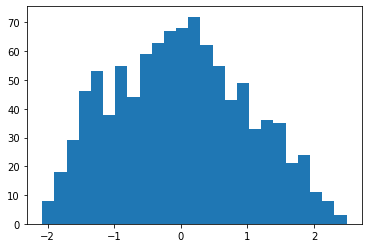

In [87]:
# demonstration of the power transform on data with a skew
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot as plt
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
plt.hist(data, bins=25)
plt.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)
# histogram of the transformed data
plt.hist(data_trans, bins=25)
plt.show()

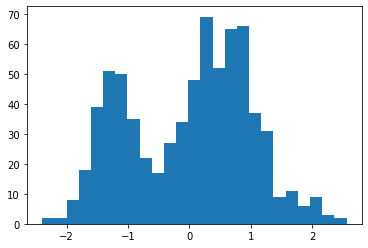

In [88]:
# Explore power transform
data = all_df[['opening_weekend_usa']]
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)
plt.hist(data_trans, bins=25)
plt.show()

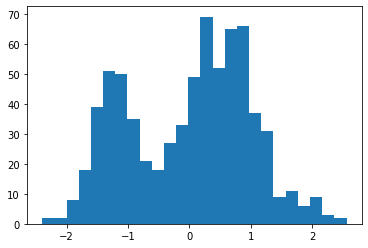

In [89]:
# Explore power transform (box-cox)
data = all_df[['opening_weekend_usa']]
power = PowerTransformer(method='box-cox', standardize=True)
data_trans = power.fit_transform(data)
plt.hist(data_trans, bins=25)
plt.show()

In [90]:
# Seems like both log and power transform are similarr
all_df['log_owu'] = np.log(all_df['opening_weekend_usa'])

data = all_df[['opening_weekend_usa']]
power = PowerTransformer(method='box-cox', standardize=True)
data_trans = power.fit_transform(data)
all_df['log_owu'] = data_trans.reshape(len(data),)

In [91]:
all_df.shape

(1135, 47)

### (ii) IMDb rating

<AxesSubplot:>

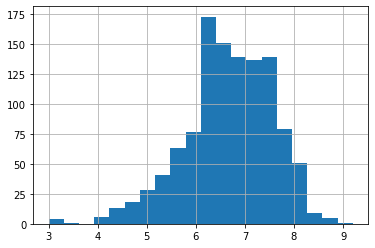

In [92]:
# Distribution looks ok. Will keep it as it is for now.
all_df['rating'].hist(bins=20)

### (2) Independent variables (predictors)
### (a) Continuous variables

#### 1. time

<AxesSubplot:>

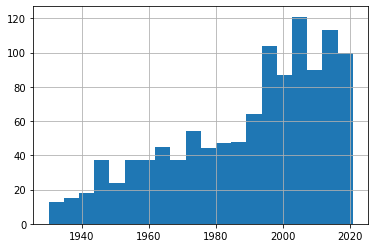

In [93]:
# Movie release year
all_df['release_year'].hist(bins=20)

<AxesSubplot:>

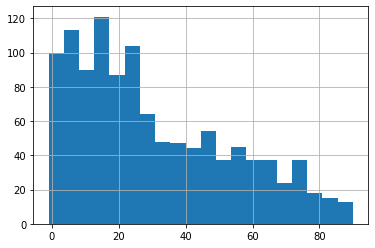

In [94]:
# Convert to "how old" the movie is
(2020-all_df['release_year']).hist(bins=20)

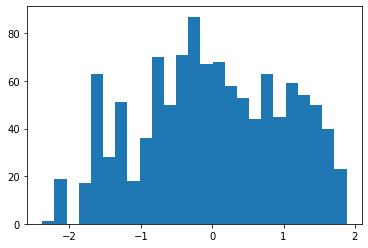

In [95]:
# Try power transform
data = (all_df[['release_year']].apply(lambda x: 2022 - x))
power = PowerTransformer(method='box-cox', standardize=True)
data_trans = power.fit_transform(data)
plt.hist(data_trans, bins=25)
plt.show()
# Create a new column in case needed in the futurre
all_df['T_movie_age'] = data_trans.reshape(len(data),)

<AxesSubplot:>

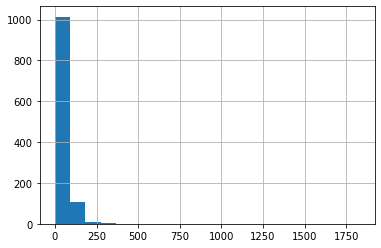

In [96]:
# Also check for book first published year
(2020-all_df['publish_year']).hist(bins=20)

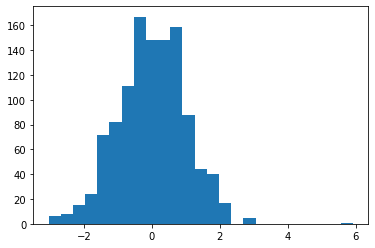

In [97]:
# Try power transform
data = (all_df[['publish_year']].apply(lambda x: 2021 - x))
power = PowerTransformer(method='box-cox', standardize=True)
data_trans = power.fit_transform(data)
plt.hist(data_trans, bins=25)
plt.show()
# Create a new column in case needed in the futurre
all_df['T_book_age'] = data_trans.reshape(len(data),)

### (b) Categorical variables - single label

### 1. MPAA rating

In [98]:
# Find the distribution and keep only the top frequent categories
all_df.MPAA.value_counts()

R           437
PG-13       228
PG          179
Approved     90
Not          67
Passed       54
G            38
Unrated       9
1h            8
TV-MA         7
TV-14         4
TV-PG         4
GP            3
M             3
M/PG          2
X             1
2h            1
Name: MPAA, dtype: int64

In [99]:
# Keep only the top 3
MPAA_discard = ['G','Passed','Not','X','M/PG','Approved','NC-17','Unrated']
all_df.MPAA.replace(MPAA_discard,'Other',inplace=True)

In [100]:
all_df.MPAA.value_counts()

R        437
Other    261
PG-13    228
PG       179
1h         8
TV-MA      7
TV-PG      4
TV-14      4
GP         3
M          3
2h         1
Name: MPAA, dtype: int64

### 2. distributor

In [101]:
all_df.distributor.value_counts().head(5)

WarnerBros.                 68
TwentiethCenturyFox         63
ParamountPictures           60
ColumbiaPictures            59
Metro-Goldwyn-Mayer(MGM)    53
Name: distributor, dtype: int64

In [102]:
# Keep only the top 3
distributor_keep = ['WarnerBros.','ParamountPictures','ColumbiaPictures','UniversalPictures',\
             'TwentiethCenturyFox','TwentiethCenturyFox']
distributor_discard = list(set(all_df.distributor.unique()).difference(set(distributor_keep)))
all_df.distributor.replace(distributor_discard,'Other',inplace=True)

In [103]:
all_df.distributor.value_counts()

Other                  840
WarnerBros.             68
TwentiethCenturyFox     63
ParamountPictures       60
ColumbiaPictures        59
UniversalPictures       45
Name: distributor, dtype: int64

### (b) Categorical variables - multi label

### 1. genre
Find the top frequent genres and convert the column from list to set in preparation for `MultiLabelBinarizer()`.

In [104]:
# Find the top 10 genre
genre_all = []
for row in all_df.genre:
    genre_all += row
genre_count = []
for genre in set(genre_all):
    genre_count.append({'genre':genre,'count':genre_all.count(genre)})
sorted(genre_count, key = lambda i: i['count'],reverse=True)

[{'genre': 'Drama', 'count': 814},
 {'genre': 'Romance', 'count': 287},
 {'genre': 'Comedy', 'count': 260},
 {'genre': 'Crime', 'count': 223},
 {'genre': 'Adventure', 'count': 216},
 {'genre': 'Thriller', 'count': 182},
 {'genre': 'Action', 'count': 161},
 {'genre': 'Mystery', 'count': 143},
 {'genre': 'Family', 'count': 125},
 {'genre': 'Fantasy', 'count': 95},
 {'genre': 'Horror', 'count': 77},
 {'genre': 'Sci-Fi', 'count': 74},
 {'genre': 'War', 'count': 47},
 {'genre': 'Film-Noir', 'count': 35},
 {'genre': 'History', 'count': 33},
 {'genre': 'Animation', 'count': 28},
 {'genre': 'Biography', 'count': 27},
 {'genre': 'Western', 'count': 20},
 {'genre': 'Music', 'count': 14},
 {'genre': 'Sport', 'count': 12},
 {'genre': 'Musical', 'count': 11}]

In [105]:
# Keep only the top 12 genre
genre_list = ['Drama','Adventure','Comedy','Action','Crime','Romance','Thriller',\
              'Mystery','Family','Fantasy','Horror','Sci-Fi']
# The rest will go to "Other"
all_df['genre']= all_df.genre.apply(lambda x:\
                            [genre if genre in genre_list else 'Other'for genre in x])
# Convert genre column from list to set
all_df['genre'] = all_df.genre.apply(lambda x: set(x))
all_df[['genre']]

,genre
0,"{Drama, Romance}"
1,"{Drama, Crime}"
2,"{Family, Adventure, Fantasy}"
4,"{Drama, Romance}"
8,"{Drama, Romance, Family}"
...,...
1518,{Drama}
1519,"{Drama, Romance}"
1520,"{Drama, Family, Comedy}"
1521,"{Drama, Crime, Thriller}"


### 2. language

In [106]:
# Find the top 10 language
language_all = []
for row in all_df.language:
    language_all += row
language_count = []
for language in set(language_all):
    language_count.append({'language':language,'count':language_all.count(language)})
sorted(language_count, key = lambda i: i['count'],reverse=True)

[{'language': 'English', 'count': 1135},
 {'language': 'French', 'count': 119},
 {'language': 'Spanish', 'count': 88},
 {'language': 'German', 'count': 81},
 {'language': 'Italian', 'count': 53},
 {'language': 'Russian', 'count': 45},
 {'language': 'Latin', 'count': 26},
 {'language': 'Japanese', 'count': 19},
 {'language': 'Arabic', 'count': 18},
 {'language': 'Mandarin', 'count': 14},
 {'language': 'Portuguese', 'count': 10},
 {'language': 'Greek', 'count': 10},
 {'language': 'Hebrew', 'count': 10},
 {'language': 'Polish', 'count': 8},
 {'language': 'Cantonese', 'count': 6},
 {'language': 'Dutch', 'count': 6},
 {'language': 'Turkish', 'count': 5},
 {'language': 'Swedish', 'count': 5},
 {'language': 'Ukrainian', 'count': 5},
 {'language': 'Hindi', 'count': 5},
 {'language': 'Danish', 'count': 4},
 {'language': 'Yiddish', 'count': 4},
 {'language': 'Chinese', 'count': 4},
 {'language': 'AmericanSignLanguage', 'count': 4},
 {'language': 'Urdu', 'count': 3},
 {'language': 'Icelandic', 'c

In [107]:
# Keep only the top 6 language
language_list = ['English','French','German','Spanish','Russian','Italian']
# The rest will go to "Other"
all_df['language']= all_df.language.apply(lambda x:\
                            [language if language in language_list else 'Other' for language in x])
# Convert genre column from list to set
all_df['language'] = all_df.language.apply(lambda x: set(x))
all_df[['language']]

,language
0,"{English, Other}"
1,"{English, Other, Italian}"
2,{English}
4,"{English, French}"
8,"{French, English, German}"
...,...
1518,{English}
1519,{English}
1520,{English}
1521,{English}


### 3. country

In [116]:
# Find the top 10 country
country_all = []
for row in all_df.country:
    country_all += row
country_count = []
for country in set(country_all):
    country_count.append({'country':country,'count':country_all.count(country)})
sorted(country_count, key = lambda i: i['count'],reverse=True)

[{'country': 'USA', 'count': 830},
 {'country': 'UK', 'count': 182},
 {'country': 'Other', 'count': 139},
 {'country': 'Germany', 'count': 60},
 {'country': 'France', 'count': 54},
 {'country': 'Canada', 'count': 50}]

In [117]:
# Keep only the top 5 country
country_list = ['USA','UK','Germany','France','Canada','Italy','Australia','India']
# The rest will go to "Other"
all_df['country']= all_df.country.apply(lambda x:\
                            [country if country in country_list else 'Other' for country in x])
# Convert genre column from list to set
all_df['country'] = all_df.country.apply(lambda x: set(x))
all_df[['country']]

<ipython-input-117-cd5c8916fe15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['country']= all_df.country.apply(lambda x:\
<ipython-input-117-cd5c8916fe15>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['country'] = all_df.country.apply(lambda x: set(x))


,country
1,{USA}
2,"{UK, USA}"
4,{USA}
8,"{Canada, USA}"
13,{USA}
...,...
1514,{USA}
1515,{USA}
1516,"{UK, USA}"
1517,{USA}


In [118]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 1 to 1520
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   movie_title             830 non-null    object        
 1   rating                  830 non-null    float64       
 2   MPAA                    830 non-null    object        
 3   genre                   830 non-null    object        
 4   release_date            830 non-null    datetime64[ns]
 5   budget                  830 non-null    float64       
 6   opening_weekend_usa     596 non-null    float64       
 7   gross_usa               830 non-null    float64       
 8   gross_world             680 non-null    float64       
 9   runtime                 830 non-null    float64       
 10  director                830 non-null    object        
 11  writer                  830 non-null    object        
 12  actor                   830 non-null    object   

In [119]:
all_df[all_df.title_search.isna() == True]

,movie_title,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,author_popularity,log_book_search,log_author_search,book_popularity_test,log_book_popularity,author_popularity_test,log_author_popularity,log_owu,T_movie_age,T_book_age


In [120]:
# Drop budget == NaN
all_df = all_df.dropna(subset=['budget'])
# Fill page with mean
all_df[['page']] = all_df[['page']].fillna(value = all_df['page'].mean())
all_df[['runtime']] = all_df[['runtime']].fillna(value = all_df['runtime'].mean())
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 1 to 1520
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   movie_title             830 non-null    object        
 1   rating                  830 non-null    float64       
 2   MPAA                    830 non-null    object        
 3   genre                   830 non-null    object        
 4   release_date            830 non-null    datetime64[ns]
 5   budget                  830 non-null    float64       
 6   opening_weekend_usa     596 non-null    float64       
 7   gross_usa               830 non-null    float64       
 8   gross_world             680 non-null    float64       
 9   runtime                 830 non-null    float64       
 10  director                830 non-null    object        
 11  writer                  830 non-null    object        
 12  actor                   830 non-null    object   

In [121]:
# Save the cleaned all_df
all_df.to_pickle('../dump/complete_data_cleaned')